# Linear regression

X1 = total overall reported crime rate per 1 million residents

X2 = reported violent crime rate per 100,000 residents

X3 = annual police funding in $/resident

X4 = % of people 25 years+ with 4 yrs. of high school

X5 = % of 16 to 19 year-olds not in highschool and not highschool graduates.

X6 = % of 18 to 24 year-olds in college

X7 = % of people 25 years+ with at least 4 years of college

Reference: Life In America's Small Cities, By G.S. Thomas

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

crime_df = pd.read_csv("crime_data.csv")

crime_df.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


In [6]:
crime_df.corr()

,X1,X2,X3,X4,X5,X6,X7
X1,1.000000,0.756505,0.533198,-0.135459,0.322519,-0.175224,-0.026283
X2,0.756505,1.000000,0.509339,-0.184445,0.291031,-0.199070,-0.045570
X3,0.533198,0.509339,1.000000,0.120265,0.311526,-0.277475,0.124502
X4,-0.135459,-0.184445,0.120265,1.000000,-0.537162,0.182364,0.681072
X5,0.322519,0.291031,0.311526,-0.537162,1.000000,-0.626953,-0.513958
X6,-0.175224,-0.199070,-0.277475,0.182364,-0.626953,1.000000,0.591663
X7,-0.026283,-0.045570,0.124502,0.681072,-0.513958,0.591663,1.000000


<Axes: >

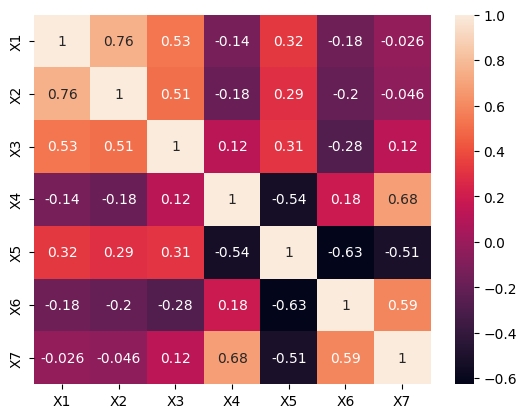

In [7]:
sns.heatmap(crime_df.corr(),annot=True)

In [8]:
crime_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'], dtype='object')

In [10]:
from sklearn.linear_model import LinearRegression

crime_df = crime_df[['X5','X1']]
# x is what we are using to predict
X = np.array(crime_df['X5']).reshape(-1,1)
# y is what we are predicting
y = np.array(crime_df['X1']).reshape(-1,1)

#1. train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=32)

In [11]:
#2. Create the model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [12]:
#3. predict new values
y_pred = regression_model.predict(X_test)
y_pred

array([[824.84992679],
       [676.62367582],
       [729.5616226 ],
       [687.21126518],
       [793.08715873],
       [623.68572905],
       [697.79885453],
       [644.86090776],
       [750.73680131],
       [740.14921195],
       [687.21126518],
       [740.14921195],
       [782.49956937],
       [729.5616226 ],
       [793.08715873]])

In [13]:
# r squared 
accuracy_score = regression_model.score(X_test, y_test)
print(accuracy_score)

0.1533224430792084


In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.1533224430792084

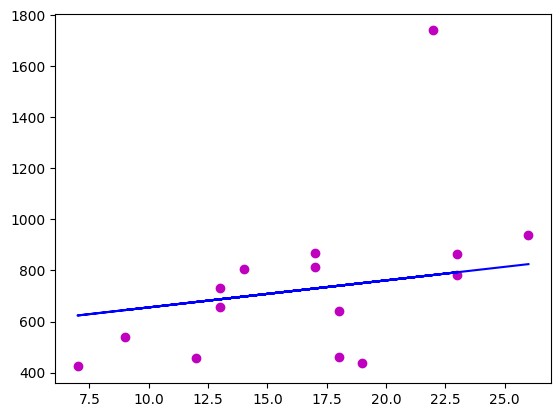

In [16]:
plt.scatter(X_test, y_test, color = 'm')
plt.plot(X_test, y_pred, color='b')
plt.show()